In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [66]:
df = pd.read_csv('salary_data_cleaned.csv')

In [67]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  max_salary avg_salary job_state same_state age  python_yn  R_yn  spark  aws  \
0         91       72.0        NM          0  47          1     0      0    0   
1        112       87.5        MD          0  36          1     0      0    0   
2         90       85.0        FL          1  10          1     0      1    0   
3         97       76.5        WA          1  55          1     0      0    0   
4        143      114.5        NY          1  22          1     0      0    0   

   excel  
0      1  
1      0  
2      1  
3      0  
4      1  

[5 rows x 28 columns]

In [38]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [39]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [40]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [41]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [42]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [43]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [44]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [45]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

hourly  min_salary  max_salary
165       1          34          48
177       1          42          68
197       1          36          50
202       1          42          68
210       1          30          50
246       1          34          48
271       1          42          68
337       1          36          50
345       1          48          78
357       1          42          68
363       1          50          56
408       1          42          58
409       1          20          34
492       1          36          50
509       1          48          78
533       1          42          68
542       1          50          56
617       1          42          58
618       1          20          34
645       1          54          94
666       1          36          50
682       1          48          78
711       1          42          68
724       1          50          56

In [46]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [47]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [48]:
df.describe()

Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.719677   
std      0.801210   497.183763    0.177034           0.149721   30.980593   
min     -1.000000    -1.000000    0.000000           0.000000   15.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   128.149596  100.626011    0.557951   46.591644    0.528302    0.002695   
std     45.220324   38.855948    0.496965   53.778815    0.499535    0.051882   
min     16.000000   13.500000    0.000000   -1.000000    0.000000    0.000000   
25%     96.000000   73.500000    0.000000   11.000000    0.000000    0.000000   
50%    124.000000   97.500000    1.000000   24.000000    1.000000    0.000000   
75%    155.000000  122.500000    1.000000   59.000000    1.000000    0.000000   
max    306.000000  254.000000    1.000000  276.000000    1.000000    1.000000   

            spark         aws       excel    num_comp  
count  742.000000  742.000000  742.000000  742.000000  
mean     0.225067    0.237197    0.522911    1.053908  
std      0.417908    0.425651    0.499812    1.384239  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    0.000000  
75%      0.000000    0.000000    1.000000    3.000000  
max      1.000000    1.000000    1.000000    4.000000

## Visualizations

<AxesSubplot:>

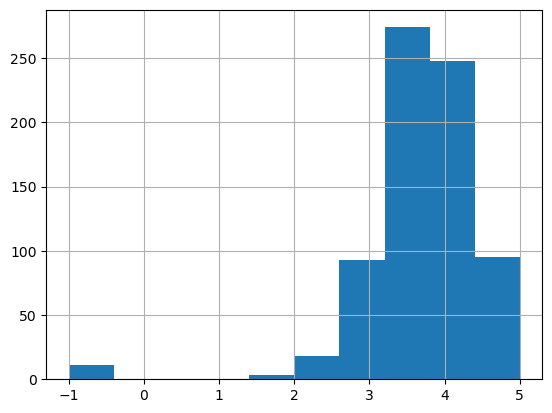

In [18]:
df.Rating.hist()

<AxesSubplot:>

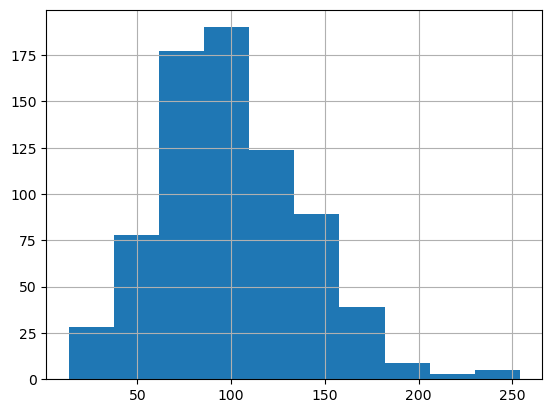

In [19]:
df.avg_salary.hist()

In [ ]:
df[['age','avg_salary','Rating','desc_len']].corr()

In [61]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'num_comp'],
      dtype='object')

In [64]:
df_sal_corr = df[['Job Title','Location', 'Size','Industry', 'Sector', 'Revenue', 'job_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority','Salary Estimate']]

In [65]:
df_sal_corr.head()

Job Title         Location                    Size  \
0             Data Scientist  Albuquerque, NM   501 to 1000 employees   
1  Healthcare Data Scientist    Linthicum, MD        10000+ employees   
2             Data Scientist   Clearwater, FL   501 to 1000 employees   
3             Data Scientist     Richland, WA  1001 to 5000 employees   
4             Data Scientist     New York, NY     51 to 200 employees   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue job_state  python_yn  R_yn  spark  aws  \
0         $50 to $100 million (USD)        NM          1     0      0    0   
1            $2 to $5 billion (USD)        MD          1     0      0    0   
2        $100 to $500 million (USD)        FL          1     0      1    0   
3  $500 million to $1 billion (USD)        WA          1     0      0    0   
4          Unknown / Non-Applicable        NY          1     0      0    0   

   excel        job_simp seniority              Salary Estimate  
0      1  data scientist        na   $53K-$91K (Glassdoor est.)  
1      0  data scientist        na  $63K-$112K (Glassdoor est.)  
2      1  data scientist        na   $80K-$90K (Glassdoor est.)  
3      0  data scientist        na   $56K-$97K (Glassdoor est.)  
4      1  data scientist        na  $86K-$143K (Glassdoor est.)

In [60]:
correlation_matrix_1 = df_sal_corr.corr()

# Display the correlation matrix
print(correlation_matrix_1)

           python_yn      R_yn     spark       aws     excel
python_yn   1.000000  0.049124  0.347619  0.203221 -0.021519
R_yn        0.049124  1.000000 -0.028017 -0.028990  0.049658
spark       0.347619 -0.028017  1.000000  0.298822 -0.047334
aws         0.203221 -0.028990  0.298822  1.000000 -0.019235
excel      -0.021519  0.049658 -0.047334 -0.019235  1.000000


In [55]:
correlations = df[df_sal_corr].corrwith(df['Salary Estimate'])
print(correlations)


ValueError: Boolean array expected for the condition, not object

<AxesSubplot:>

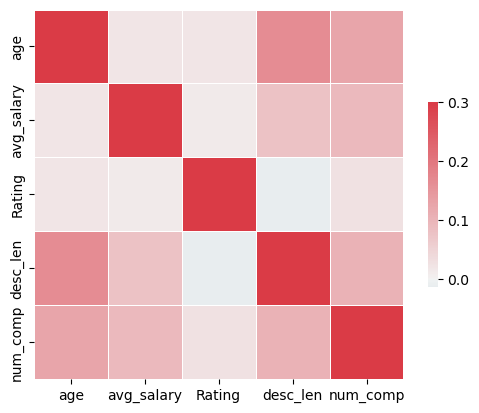

In [21]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

### Visualizing each column as a bar plot

graph for Location: total = 200


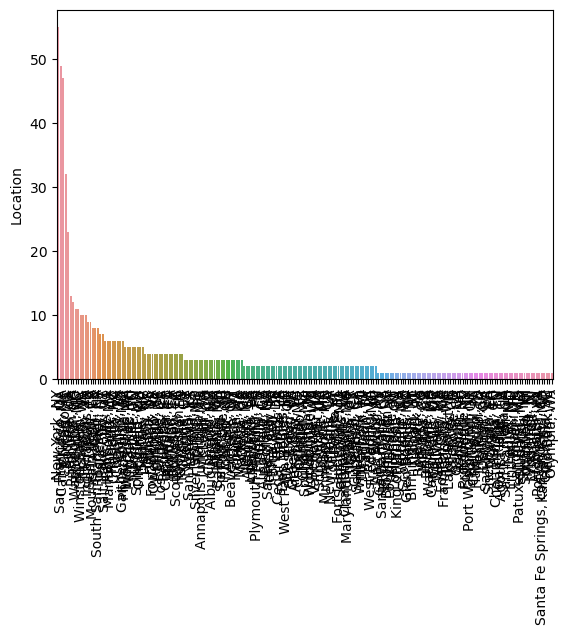

graph for Headquarters: total = 198


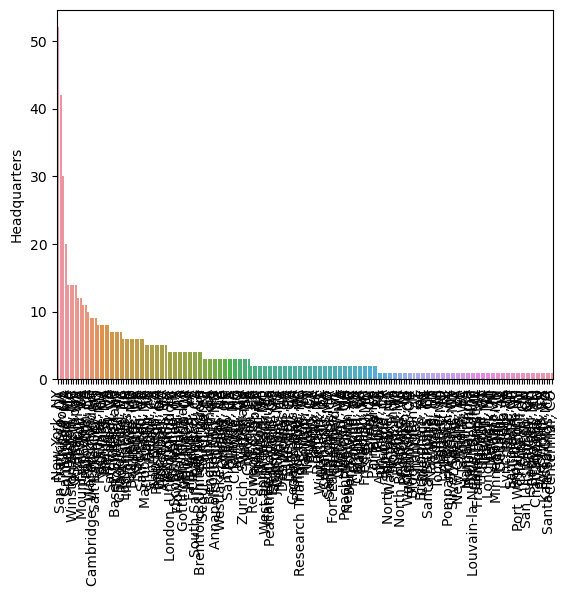

graph for Size: total = 9


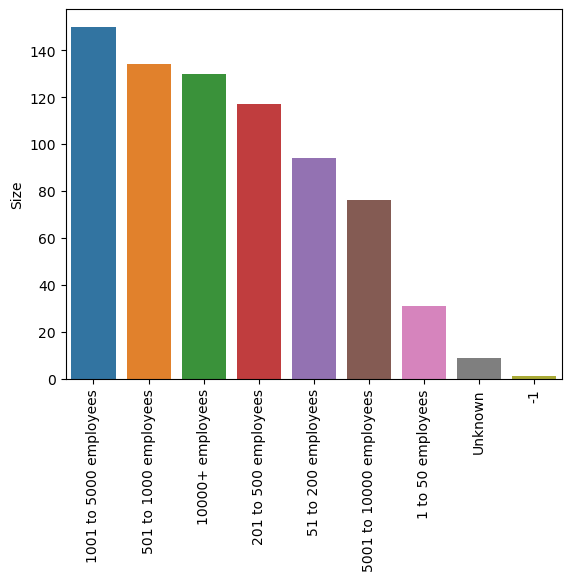

graph for Type of ownership: total = 11


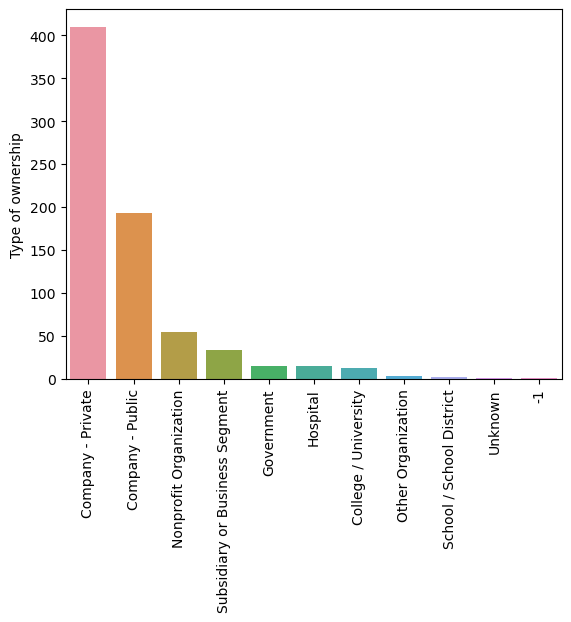

graph for Industry: total = 60


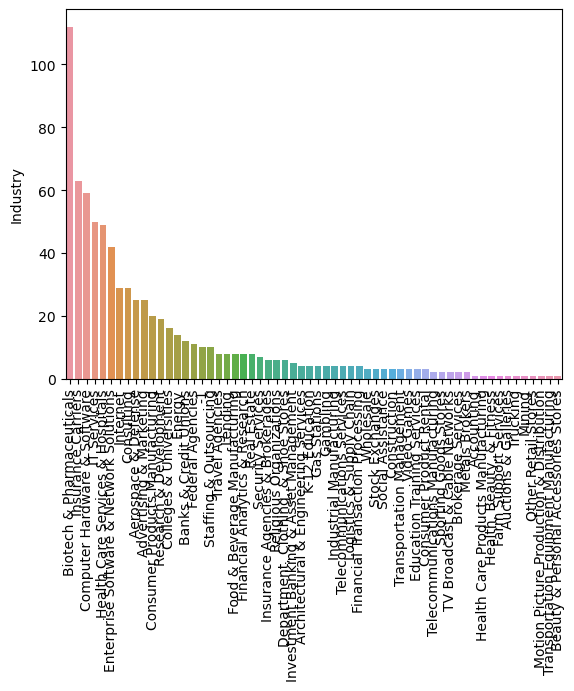

graph for Sector: total = 25


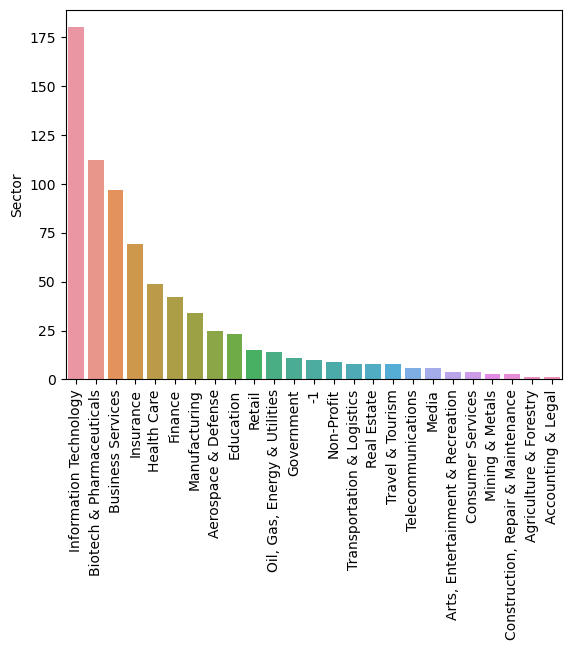

graph for Revenue: total = 14


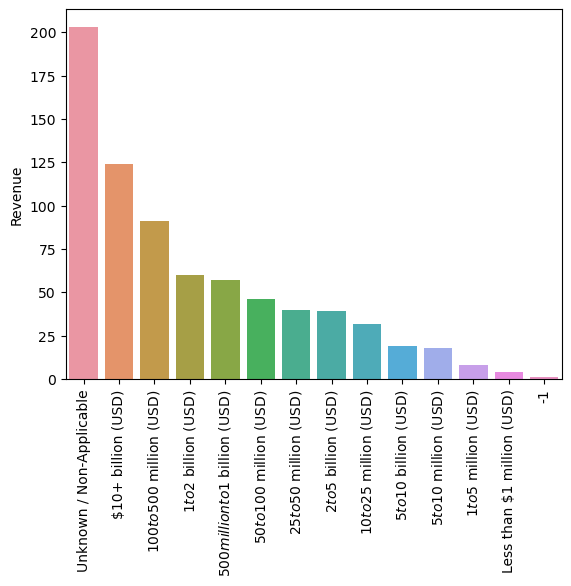

graph for company_txt: total = 343


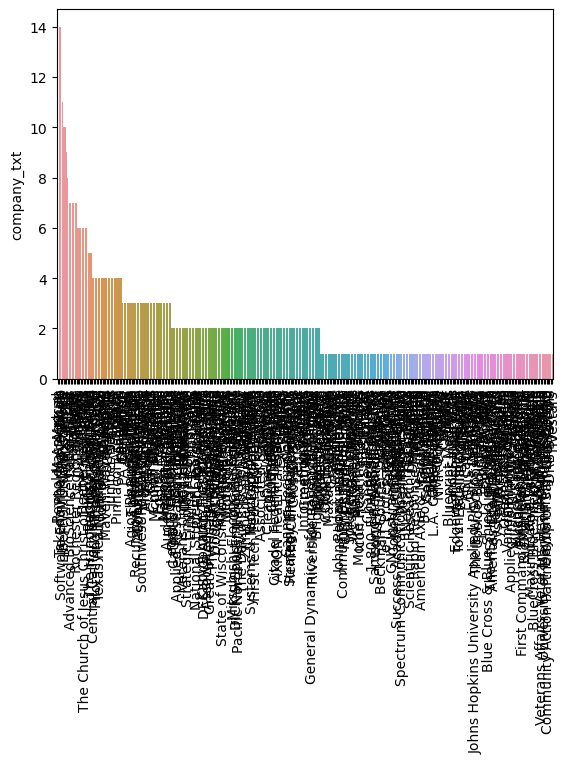

graph for job_state: total = 37


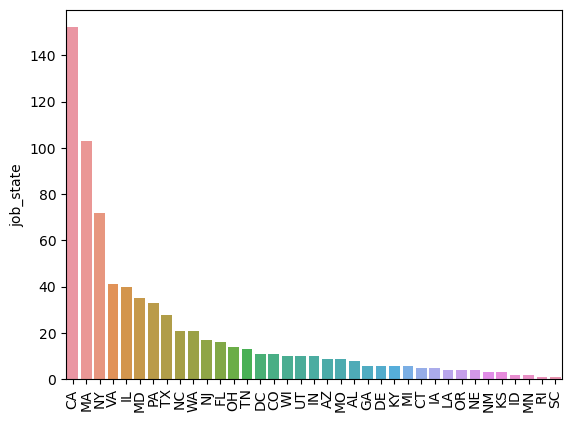

graph for same_state: total = 2


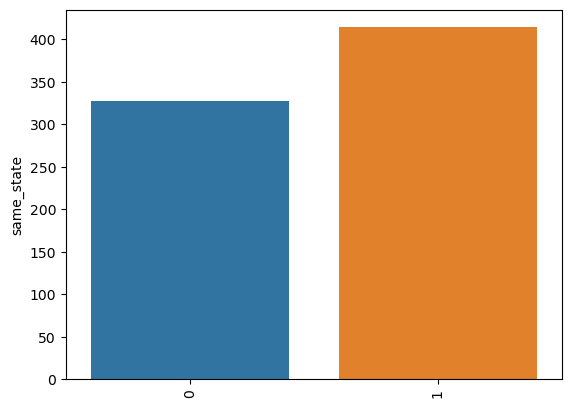

graph for python_yn: total = 2


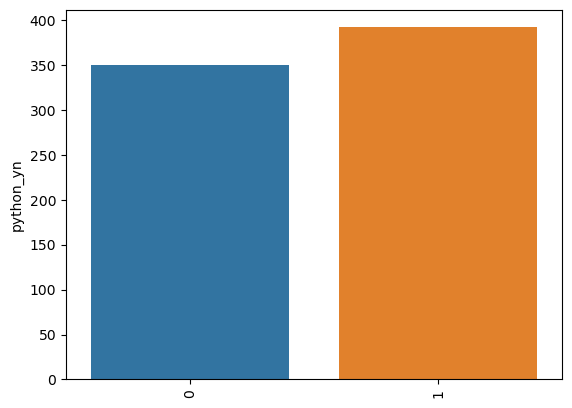

graph for R_yn: total = 2


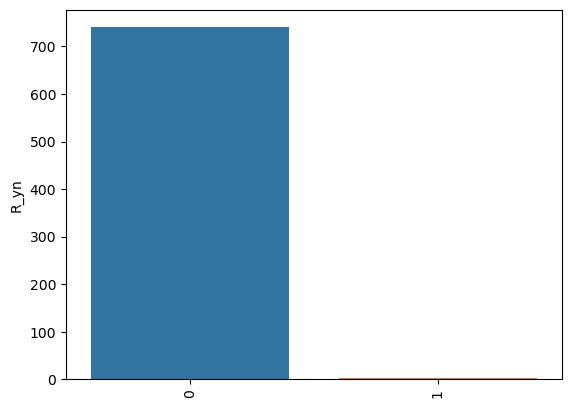

graph for spark: total = 2


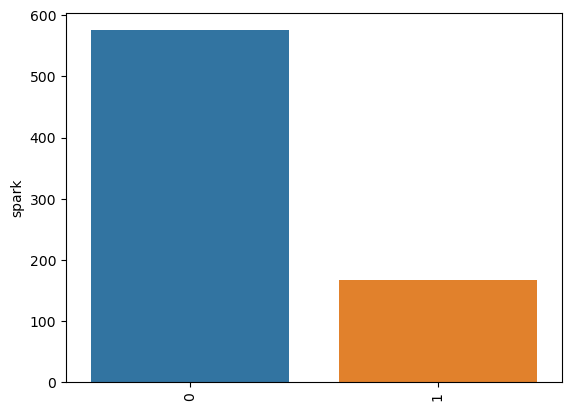

graph for aws: total = 2


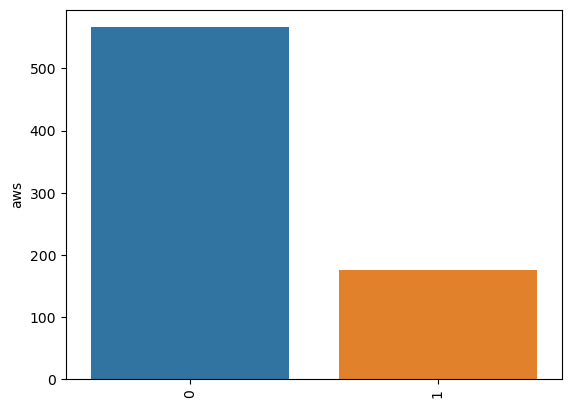

graph for excel: total = 2


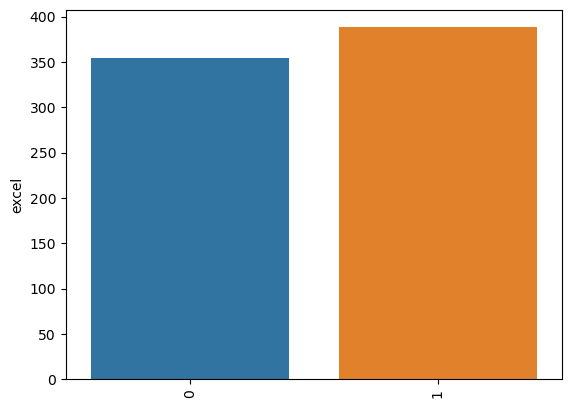

graph for job_simp: total = 7


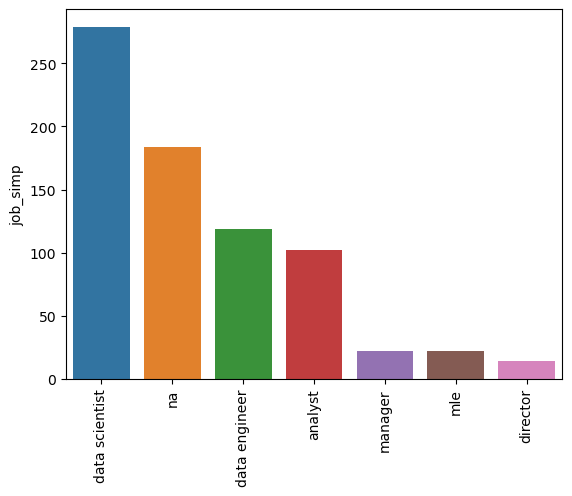

graph for seniority: total = 3


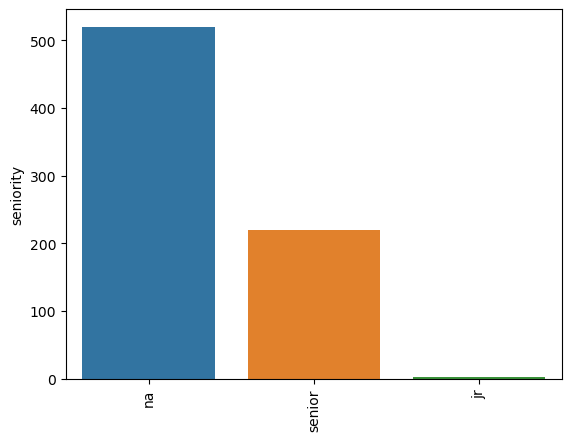

In [24]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Seaborn Pairplot - a quick overview of relationships between pairs of categorical variables and distributions of individual variables


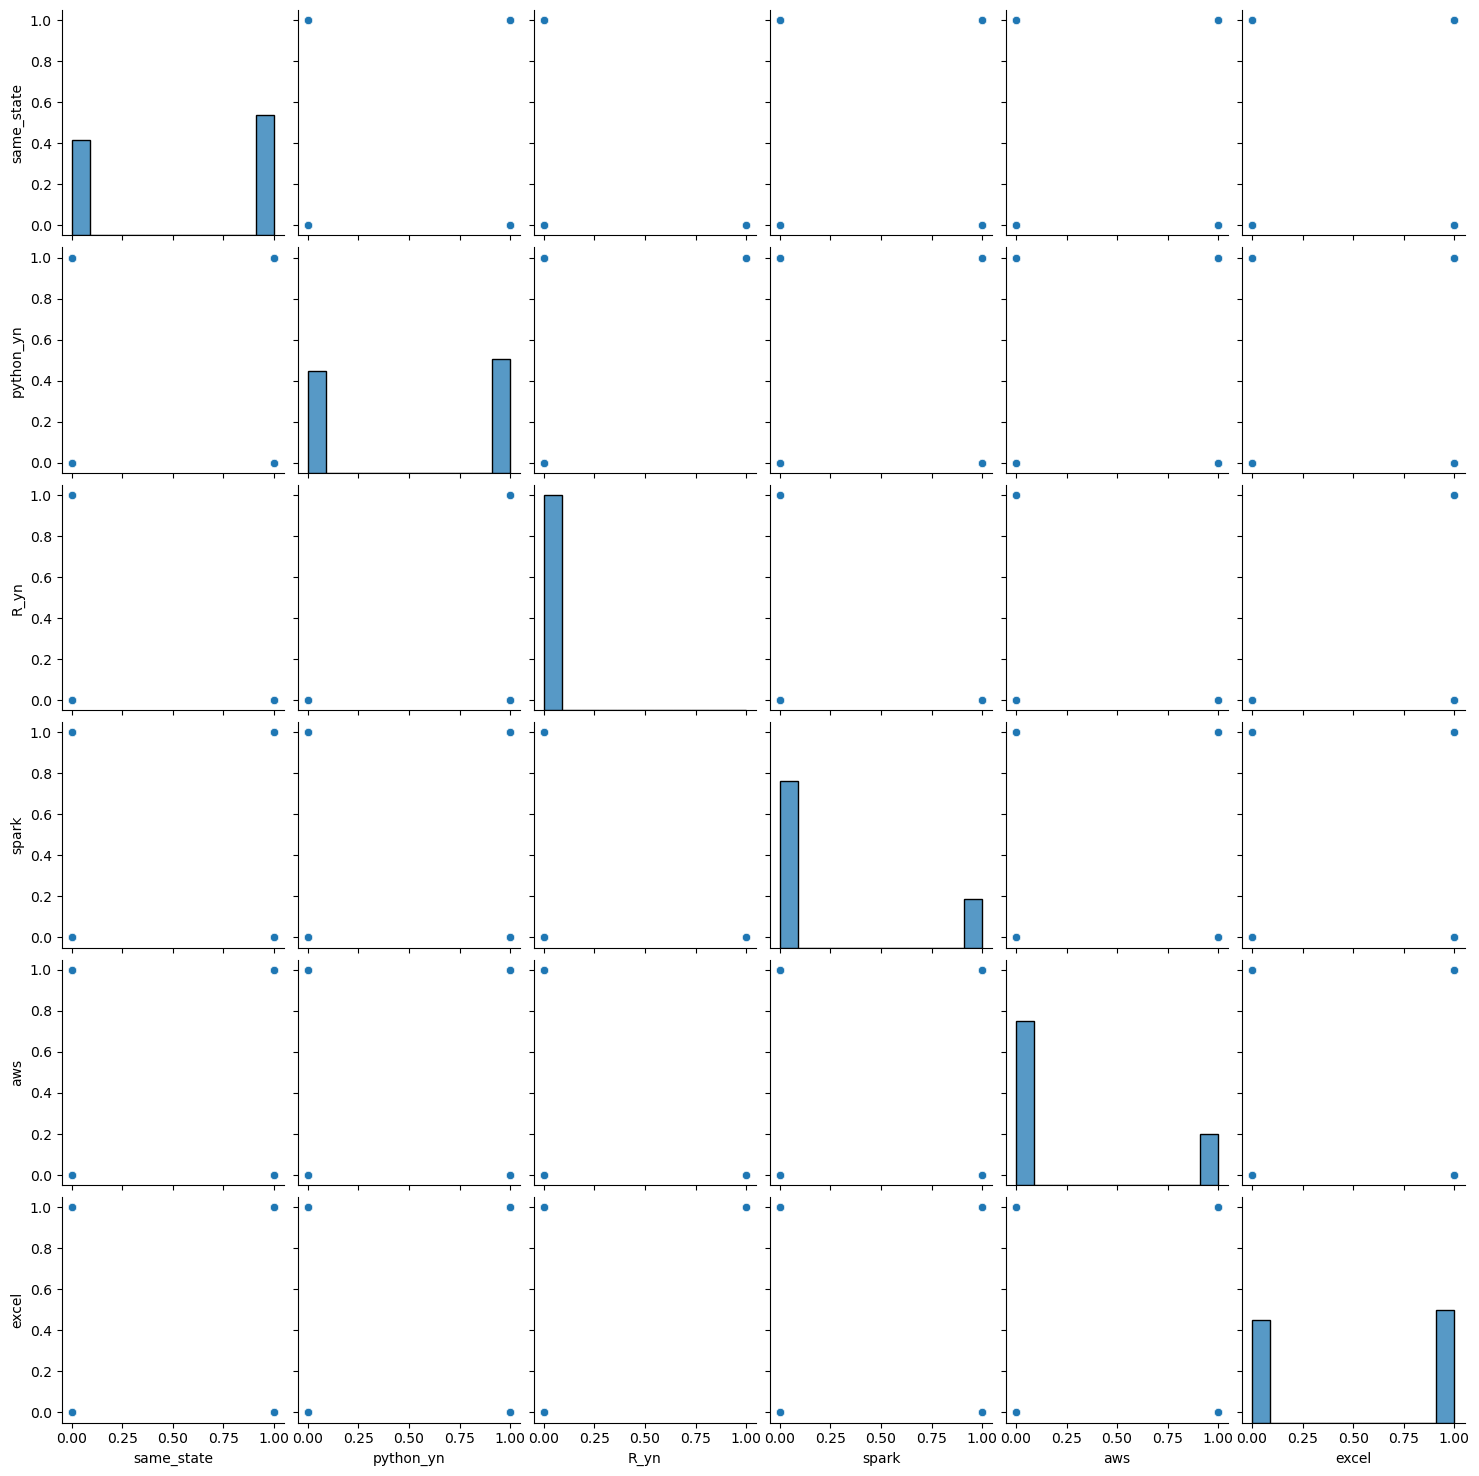

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_cat)
plt.show()


### Distribution of Job Titles

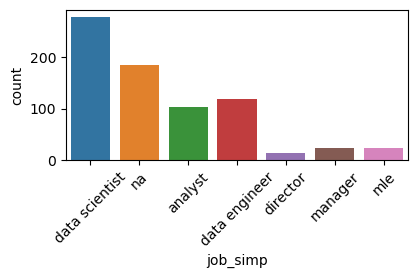

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

cat_new_df = df[['job_simp']]
for i, col in enumerate(cat_new_df.columns):
    plt.subplot(4, 4, i+1)
    sns.countplot(data=df_cat, x=col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


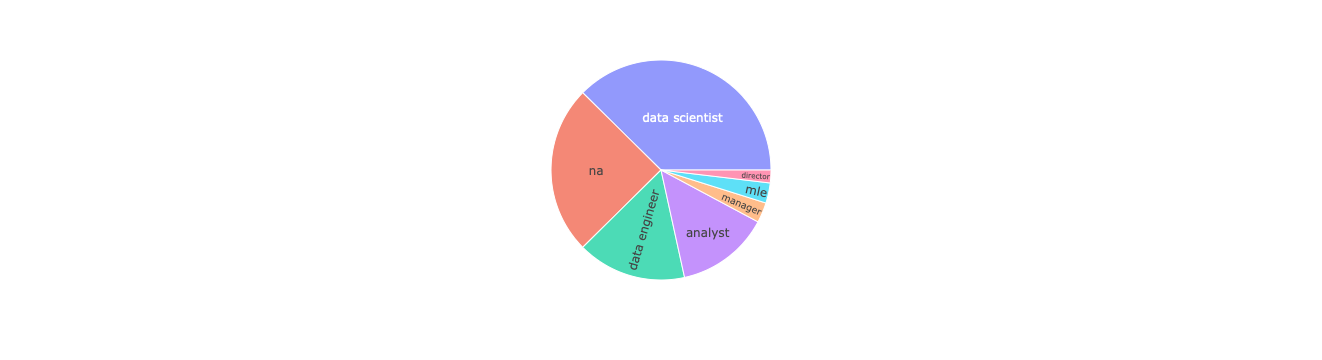

In [27]:
import plotly.express as px

fig = px.sunburst(df_cat, path=['job_simp'])
fig.show()


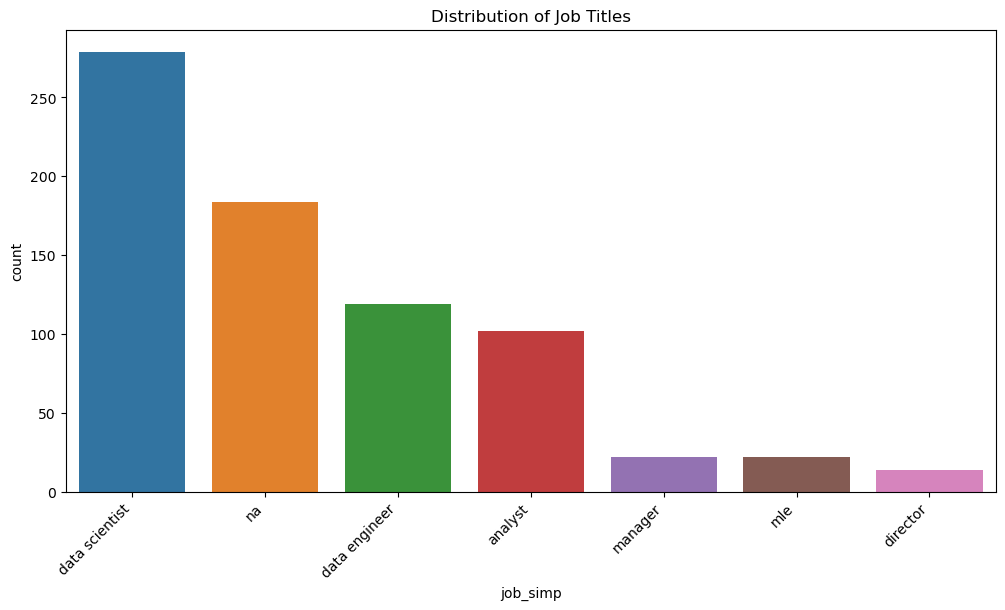

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cat, x='job_simp', order=df_cat['job_simp'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Job Titles')
plt.show()


In [29]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

avg_salary
job_simp                  
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mle             126.431818
na               84.853261

In [30]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

### Visualizing average salary by Job title and Seniority

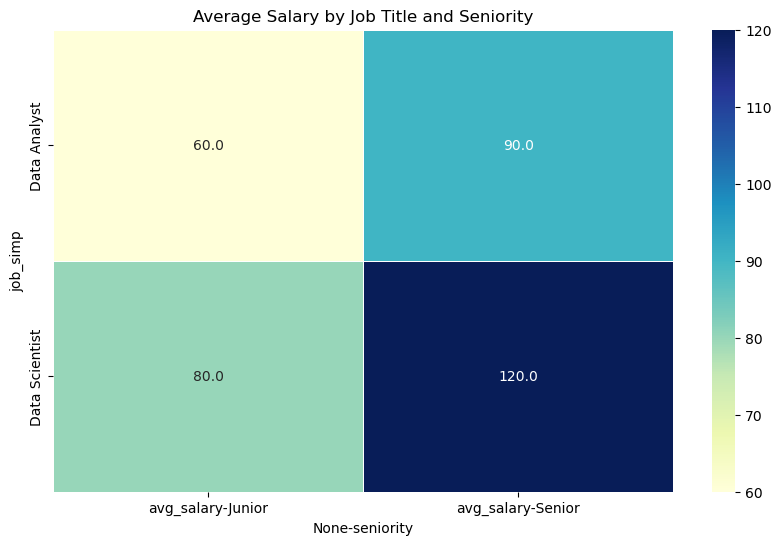

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'job_simp': ['Data Scientist', 'Data Analyst', 'Data Scientist', 'Data Analyst'],
        'seniority': ['Junior', 'Junior', 'Senior', 'Senior'],
        'avg_salary': [80, 60, 120, 90]}
df = pd.DataFrame(data)

# Pivot table
pivot_df = pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

# Reshape the pivot table for visualization
heatmap_df = pivot_df.unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Average Salary by Job Title and Seniority')
plt.show()


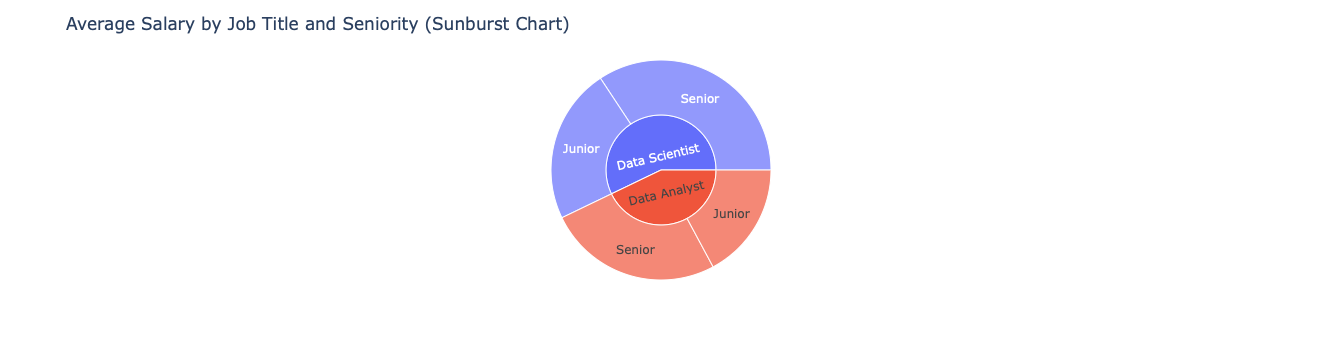

In [32]:
import pandas as pd
import plotly.express as px

# Sample DataFrame
data = {'job_simp': ['Data Scientist', 'Data Analyst', 'Data Scientist', 'Data Analyst'],
        'seniority': ['Junior', 'Junior', 'Senior', 'Senior'],
        'avg_salary': [80, 60, 120, 90]}
df = pd.DataFrame(data)

# Pivot table
pivot_df = pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

# Reset index to make 'job_simp' and 'seniority' regular columns
pivot_df = pivot_df.reset_index()

# Plot sunburst chart
fig = px.sunburst(pivot_df, path=['job_simp', 'seniority'], values='avg_salary')
fig.update_layout(title='Average Salary by Job Title and Seniority (Sunburst Chart)')
fig.show()


In [33]:
pd.pivot_table(df, index = ['job_state'], values = 'avg_salary').sort_values('job_state', ascending = False)

KeyError: 'job_state'

In [ ]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

In [ ]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc='count').sort_values('job_state', ascending = False)

In [ ]:
pd.set_option('display.max_rows',None) #Displaying full data frames
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cat['job_simp'].astype(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()


In [ ]:
pd.pivot_table(df[df.job_simp=='data scientist'], index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

In [ ]:
# rating, industry, sector, revenue, no of comp,etc
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [ ]:
df_pivots.columns

In [ ]:
df_pivots.dtypes

In [ ]:
for i in df_pivots.columns:
    print(i)
    if i != 'avg_salary':  # Exclude 'avg_salary' from index
        pivot_result = pd.pivot_table(df_pivots, index=i, values='avg_salary', aggfunc='mean')
        sorted_result = pivot_result.sort_values('avg_salary', ascending=False)
        print(sorted_result)


In [ ]:
df_pivots.columns

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

### Word Cloud

In [ ]:
import nltk

nltk.download('stopwords')

In [ ]:
nltk.download('punkt')


In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Download 'stopwords' resource
nltk.download('stopwords')

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
